In [67]:
import warnings
warnings.filterwarnings("ignore")

In [68]:
import pandas as pd
dataset = pd.read_csv('final_data.csv')
print(dataset.columns)
print(dataset.shape)
#print(dataset.head(10))
#print(dataset.info())
#dataset['lastsolddate']=pd.to_datetime(dataset['lastsolddate'],format='%b%d%Y')
print(dataset.dtypes)

Index(['Unnamed: 0', 'address', 'info', 'z_address', 'bathrooms', 'bedrooms',
       'finishedsqft', 'lastsolddate', 'lastsoldprice', 'latitude',
       'longitude', 'neighborhood', 'totalrooms', 'usecode', 'yearbuilt',
       'zestimate', 'zindexvalue', 'zipcode', 'zpid'],
      dtype='object')
(11330, 19)
Unnamed: 0         int64
address           object
info              object
z_address         object
bathrooms        float64
bedrooms         float64
finishedsqft     float64
lastsolddate      object
lastsoldprice    float64
latitude         float64
longitude        float64
neighborhood      object
totalrooms       float64
usecode           object
yearbuilt        float64
zestimate        float64
zindexvalue       object
zipcode          float64
zpid             float64
dtype: object


In [69]:
dataset=dataset.drop(['Unnamed: 0','z_address','info','zestimate','zipcode','zpid'],axis=1)

In [70]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        11330 non-null  object 
 1   bathrooms      11330 non-null  float64
 2   bedrooms       11330 non-null  float64
 3   finishedsqft   11330 non-null  float64
 4   lastsolddate   11330 non-null  object 
 5   lastsoldprice  11330 non-null  float64
 6   latitude       11330 non-null  float64
 7   longitude      11330 non-null  float64
 8   neighborhood   11330 non-null  object 
 9   totalrooms     11330 non-null  float64
 10  usecode        11330 non-null  object 
 11  yearbuilt      11330 non-null  float64
 12  zindexvalue    11330 non-null  object 
dtypes: float64(8), object(5)
memory usage: 1.1+ MB
None


In [71]:
print(dataset['zindexvalue'].head())

0      975,700
1      975,700
2    1,277,600
3    1,277,600
4    1,248,000
Name: zindexvalue, dtype: object


In [72]:
#dataset['zindexvalue']=pd.to_numeric(dataset['zindexvalue'],errors='ignore',downcast='integer')
#dataset['zindexvalue']=dataset['zindexvalue'].astype(str)
dataset['zindexvalue']=dataset['zindexvalue'].str.replace(',','')
dataset['zindexvalue']=pd.to_numeric(dataset['zindexvalue'])

print(dataset['zindexvalue'])
print(dataset.dtypes)
print(dataset['lastsolddate'].min(),dataset['lastsolddate'].max())

0         975700
1         975700
2        1277600
3        1277600
4        1248000
          ...   
11325    1628900
11326     957300
11327     804400
11328    1030300
11329    1214400
Name: zindexvalue, Length: 11330, dtype: int64
address           object
bathrooms        float64
bedrooms         float64
finishedsqft     float64
lastsolddate      object
lastsoldprice    float64
latitude         float64
longitude        float64
neighborhood      object
totalrooms       float64
usecode           object
yearbuilt        float64
zindexvalue        int64
dtype: object
01/02/2013 12/31/2015


In [73]:
dataset.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zindexvalue
count,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04
mean,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.320205e+06
std,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,5.848170e+05
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,6.881000e+05
25%,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.829000e+05
50%,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.211900e+06
75%,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.480400e+06
max,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,5.333500e+06


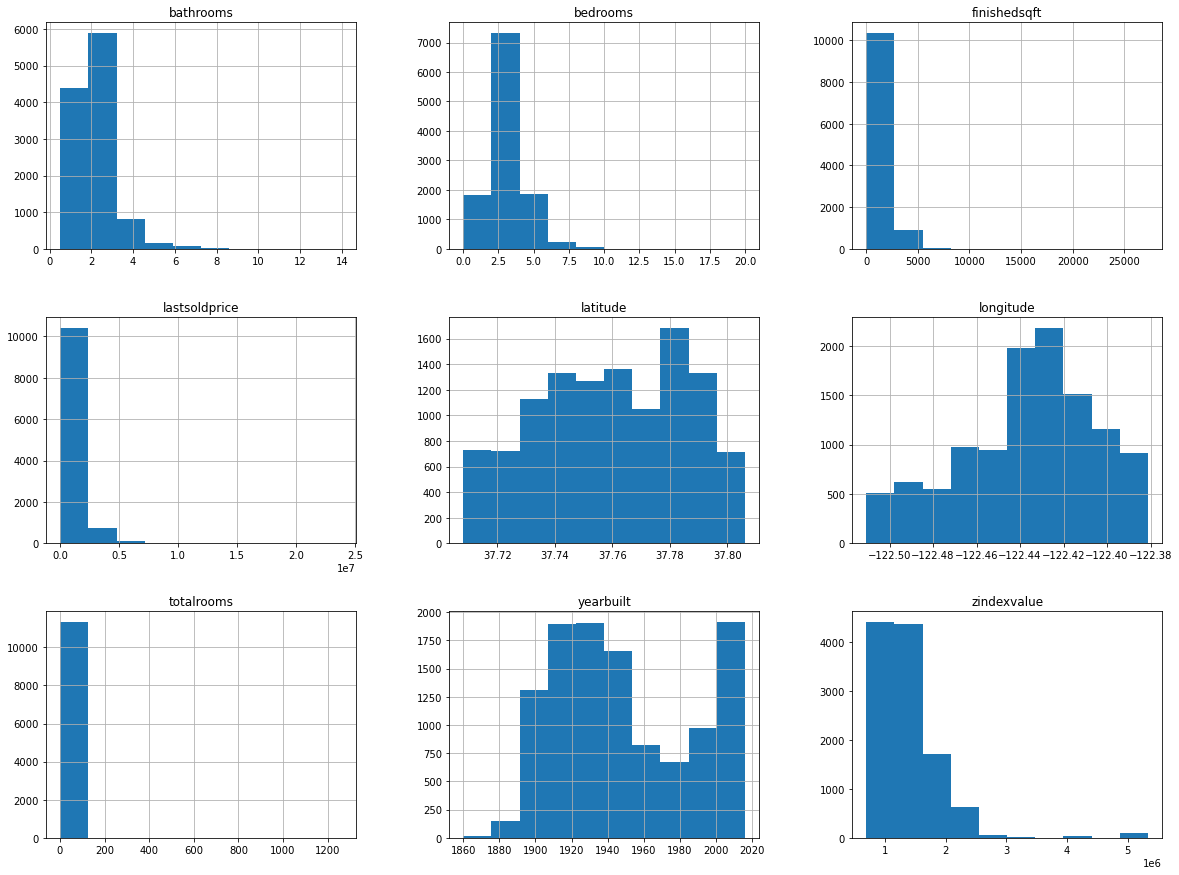

In [74]:
import matplotlib.pyplot as plt
#plt.hist(dataset['bathrooms'],alpha=0.5, label='bathrooms')
#plt.hist(dataset['bedrooms'],alpha=0.5, label='bedrooms')
#plt.hist(dataset['finishedsqft'],alpha=0.5, label='finishedsqft')
#plt.hist(dataset['lastsoldprice'],alpha=0.5, label='lastsoldprice')
#plt.legend(loc='upper right')
dataset.hist(figsize=(20,15))
plt.grid()
plt.show()

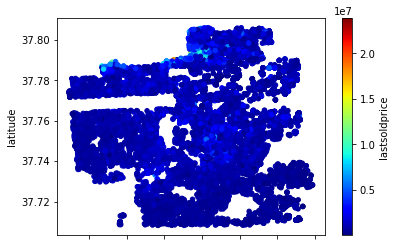

In [75]:
dataset.plot(kind="scatter", x="longitude", y="latitude", c="lastsoldprice", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.show()

In [76]:
corr=dataset.corr()
corr['lastsoldprice'].sort_values(ascending=False)

lastsoldprice    1.000000
finishedsqft     0.647208
bathrooms        0.536880
zindexvalue      0.460429
bedrooms         0.395478
latitude         0.283107
totalrooms       0.093527
longitude       -0.052595
yearbuilt       -0.189055
Name: lastsoldprice, dtype: float64

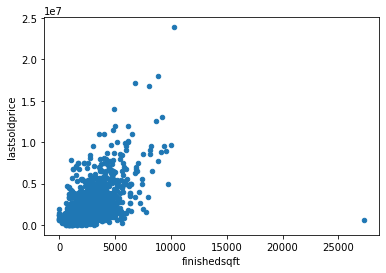

In [77]:
dataset.plot(kind="scatter", x="finishedsqft", y="lastsoldprice")
plt.show()

In [78]:
dataset['price_per_sqft']=dataset['lastsoldprice']/dataset['finishedsqft']
corr=dataset.corr()
corr['lastsoldprice'].sort_values()

yearbuilt        -0.189055
longitude        -0.052595
price_per_sqft    0.005008
totalrooms        0.093527
latitude          0.283107
bedrooms          0.395478
zindexvalue       0.460429
bathrooms         0.536880
finishedsqft      0.647208
lastsoldprice     1.000000
Name: lastsoldprice, dtype: float64

In [79]:
neigh=dataset['neighborhood'].unique()
print(len(neigh))
#print(neigh)
code=dataset['usecode'].unique()
print(len(code))
print(code)

71
10
['Condominium' 'SingleFamily' 'MultiFamily2To4' 'Miscellaneous' 'Duplex'
 'Townhouse' 'Mobile' 'Apartment' 'Cooperative' 'MultiFamily5Plus']


In [80]:
freq=dataset.groupby(['neighborhood']).count()['address']

mean=dataset.groupby(['neighborhood']).mean()['price_per_sqft']
cluster = pd.concat([freq, mean], axis=1)
#print(cluster)
cluster['neighborhood'] = cluster.index
cluster.columns = ['freq', 'price_per_sqft','neighborhood']
cluster.describe()


,freq,price_per_sqft
count,71.000000,71.000000
mean,159.577465,1664.908308
std,126.572696,3619.277749
min,3.000000,374.201197
25%,67.500000,613.337664
50%,123.000000,756.246284
75%,210.500000,985.156646
max,540.000000,26914.471572


In [81]:
cluster1 = cluster[cluster.price_per_sqft < 756]
cluster1.index

Index(['Bayview', 'Central Richmond', 'Central Sunset', 'Crocker Amazon',
       'Daly City', 'Diamond Heights', 'Excelsior', 'Forest Hill',
       'Forest Hill Extension', 'Golden Gate Heights', 'Ingleside',
       'Ingleside Heights', 'Ingleside Terrace', 'Inner Parkside',
       'Inner Richmond', 'Inner Sunset', 'Lakeshore', 'Little Hollywood',
       'Merced Heights', 'Mission Terrace', 'Mount Davidson Manor',
       'Oceanview', 'Outer Mission', 'Outer Parkside', 'Outer Richmond',
       'Outer Sunset', 'Parkside', 'Portola', 'Silver Terrace', 'Sunnyside',
       'Visitacion Valley', 'West Portal', 'Western Addition',
       'Westwood Highlands', 'Westwood Park'],
      dtype='object', name='neighborhood')

In [82]:
cluster_temp = cluster[cluster.price_per_sqft >= 756]
cluster2 = cluster_temp[cluster_temp.freq <123]
cluster2.index

Index(['Buena Vista Park', 'Central Waterfront - Dogpatch', 'Corona Heights',
       'Haight-Ashbury', 'Lakeside', 'Lone Mountain', 'Midtown Terrace',
       'North Beach', 'North Waterfront', 'Parnassus - Ashbury',
       'Presidio Heights', 'Sea Cliff', 'St. Francis Wood', 'Telegraph Hill',
       'Twin Peaks'],
      dtype='object', name='neighborhood')

In [83]:
cluster3 = cluster_temp[cluster_temp.freq >=123]
cluster3.index

Index(['Bernal Heights', 'Cow Hollow', 'Downtown',
       'Eureka Valley - Dolores Heights - Castro', 'Glen Park', 'Hayes Valley',
       'Lake', 'Lower Pacific Heights', 'Marina', 'Miraloma Park', 'Mission',
       'Nob Hill', 'Noe Valley', 'North Panhandle', 'Pacific Heights',
       'Potrero Hill', 'Russian Hill', 'South Beach', 'South of Market',
       'Van Ness - Civic Center', 'Yerba Buena'],
      dtype='object', name='neighborhood')

In [84]:
def get_group(x):
    if x in cluster1.index:
        return 'low_price'
    elif x in cluster2.index:
        return 'high_price_low_freq'
    else:
        return 'high_price_high_freq'
dataset['group'] = dataset.neighborhood.apply(get_group)

In [85]:
print(dataset.columns)

Index(['address', 'bathrooms', 'bedrooms', 'finishedsqft', 'lastsolddate',
       'lastsoldprice', 'latitude', 'longitude', 'neighborhood', 'totalrooms',
       'usecode', 'yearbuilt', 'zindexvalue', 'price_per_sqft', 'group'],
      dtype='object')


In [86]:

dataset.drop(['address','lastsolddate','lastsoldprice','latitude', 'longitude', 'neighborhood','price_per_sqft'],axis=1)
dataset = dataset[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'usecode', 'yearbuilt','zindexvalue', 'group', 'lastsoldprice']]
dataset.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,usecode,yearbuilt,zindexvalue,group,lastsoldprice
0,2.0,2.0,1043.0,4.0,Condominium,2007.0,975700,high_price_high_freq,1300000.0
1,1.0,1.0,903.0,3.0,Condominium,2004.0,975700,high_price_high_freq,750000.0
2,4.0,3.0,1425.0,6.0,Condominium,2003.0,1277600,high_price_high_freq,1495000.0
3,3.0,3.0,2231.0,10.0,SingleFamily,1927.0,1277600,high_price_high_freq,2700000.0
4,3.0,3.0,1300.0,4.0,SingleFamily,1900.0,1248000,high_price_high_freq,1530000.0


In [87]:
X=pd.get_dummies(dataset,columns=['usecode','group'])
print(X.head())

   bathrooms  bedrooms  finishedsqft  totalrooms  yearbuilt  zindexvalue  \
0        2.0       2.0        1043.0         4.0     2007.0       975700   
1        1.0       1.0         903.0         3.0     2004.0       975700   
2        4.0       3.0        1425.0         6.0     2003.0      1277600   
3        3.0       3.0        2231.0        10.0     1927.0      1277600   
4        3.0       3.0        1300.0         4.0     1900.0      1248000   

   lastsoldprice  usecode_Apartment  usecode_Condominium  usecode_Cooperative  \
0      1300000.0                  0                    1                    0   
1       750000.0                  0                    1                    0   
2      1495000.0                  0                    1                    0   
3      2700000.0                  0                    0                    0   
4      1530000.0                  0                    0                    0   

   usecode_Duplex  usecode_Miscellaneous  usecode_Mobile

In [88]:
X_new=X.drop(['lastsoldprice'],axis=1)
#print(X_new)

y=dataset['lastsoldprice']
import numpy as np
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=0)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))
y_pred=reg.predict(X_test)
print(y_pred)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred,y_test)

rmse=np.sqrt(mse)
#print('{rmse:{f}}'.format(rmse=rmse, f='.4f'))
#print('{:.4f}'.format(rmse))
#print('%.4f',%rmse)
print(rmse)


0.5517095283577207
0.561924150107501
[1756408.33887872 1453829.81843448  522317.8351514  ... 1649367.79592261
 2849318.85044313 1044143.14180038]
616071.5747809005


In [63]:
print(reg.coef_)

[ 2.04243934e+05 -8.40295805e+04  5.74600787e+02  5.56233563e+03
 -1.96383276e+02  3.41075491e-01  1.37687918e+05  1.52869774e+05
 -3.93971044e+05 -5.96792870e+05  1.85715492e+05  4.22450898e+05
 -1.99897160e+05 -2.88239049e+05  4.00317207e+05  1.79858833e+05
  2.45812187e+05  5.35757094e+04 -2.99387896e+05]


In [64]:
print(reg.intercept_)

-202078.8277113496


In [102]:
import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                     x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

In [106]:
#Bulding the optimal model using Backward Elimination
import statsmodels.api as sm
SL=0.05
#X_new=X.drop(['lastsoldprice'],axis=1)
#print(X_new.shape)
X = np.append(arr = np.ones((11330,1)), values = X_new, axis = 1)
print(X.shape)

X_Modeled = backwardElimination(X, SL)
print(X_Modeled.shape)
print(X_Modeled)


(11330, 20)
(11330, 11)
[[2.000e+00 2.000e+00 1.043e+03 ... 0.000e+00 1.000e+00 0.000e+00]
 [1.000e+00 1.000e+00 9.030e+02 ... 0.000e+00 1.000e+00 0.000e+00]
 [4.000e+00 3.000e+00 1.425e+03 ... 0.000e+00 1.000e+00 0.000e+00]
 ...
 [1.000e+00 2.000e+00 8.750e+02 ... 1.000e+00 0.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 6.970e+02 ... 1.000e+00 0.000e+00 1.000e+00]
 [2.000e+00 3.000e+00 1.539e+03 ... 1.000e+00 1.000e+00 0.000e+00]]


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Modeled, 
                                                    y, test_size = 0.3, random_state = 0)

In [112]:
from sklearn.linear_model import LinearRegression
import numpy as np
reg=LinearRegression()
reg.fit(X_train,y_train)
print('%.4f'%reg.score(X_test, y_test))
y_pred=reg.predict(X_test)
#print(y_pred)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred,y_test)
rmse=np.sqrt(mse)
print('%.4f'%rmse)

0.5790
603962.7602
